Prince Kumar sharma

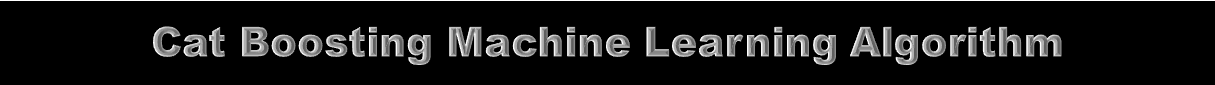

#  CatBoost :-
CatBoost is a high-performance open-source library for gradient boosting on decision trees that we can use for classification, regression and ranking tasks. CatBoost uses a combination of ordered boosting, random permutations and gradient-based optimization to achieve high performance on large and complex data sets with categorical features.

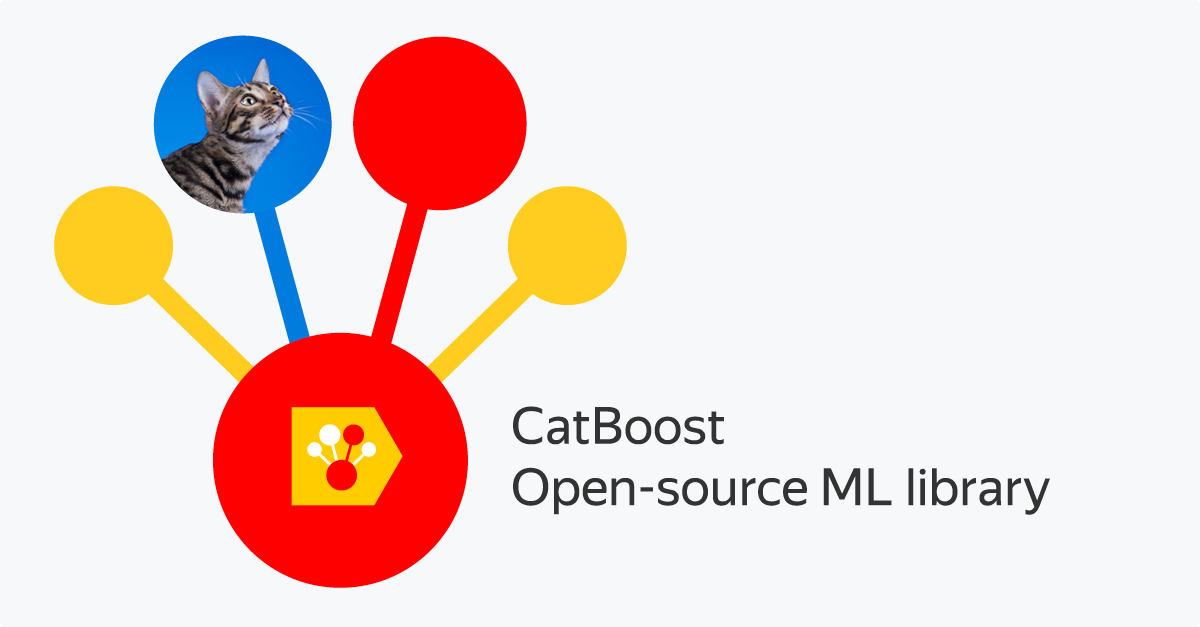

# What is CatBoost?
CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.

## It is especially powerful in two ways:

1. It yields state-of-the-art results without extensive data training typically required by other machine learning methods, and
2. Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.

## CATBOOST APPLICATIONS
* Recommendation systems
* Fraud detection
* Image classification
* Text classification
* Customer churn prediction
* Medical diagnoses
* Natural language processing (NLP)

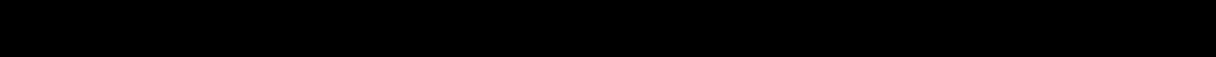

## Benefits of Using CatBoost 
#### 1. CATEGORICAL FEATURE HANDLING
* One of the most essential features of CatBoost is that it was specifically designed to handle categorical features, which are common in many real-world data sets. CatBoost can automatically convert categorical features into numerical features.

 

#### 2. REDUCED OVERFITTING
* CatBoost has an overfitting detector that stops the training when it observes overfitting. This feature helps improve the generalization performance of the model and make it more robust to new data.

 

#### 3. HIGH PERFORMANCE
* One unique feature of CatBoost is its fast and accurate predictions, even on large and more complex data sets. In terms of prediction speed and accuracy, CatBoost stands out from its competitors, such as XGBoost and LightGBM, due to the combination of features and techniques that CatBoost employs.

 

#### 4. INTERPRETABILITY
* CatBoost is more interpretable than other machine learning models. The library provides several tools for model interpretation, including feature importance and decision plots. These tools can help users understand the model’s behavior and make informed decisions about the data.

 

#### 5. SCALABILITY
* CatBoost was designed to scale on large data sets, which makes this library particularly suitable for big data applications. CatBoost supports distributed training on multiple machines and GPUs, thereby enabling users to train models on large data sets quickly.

## CatBoost advantages
1. CatBoost implements oblivious decision trees (binary tree in which same features are used to make left and right split for 2. 2. each level of the tree) thereby restricting the features split per level to one, which help in decreasing prediction time.
3. It handles categorical features effectively by ordered target statistics.
4. It is easy to use with packages in R and Python.
5. It has effective usage with default parameters thereby reducing the time needed for parameter tuning.

## Parameters:

1. verbose:  Verbosity of the output, i.e., whether to print the processing output on the screen or not. 0 for no printing, positive value for printing the intermediate processing outputs.
2. cols:  A list of features (columns) to be encoded. By default, it is None indicating that all columns with an object data type are to be encoded.
3. drop_invariant: True means drop columns with zero variance (same value for each row). False, by default.
4. return_df: True to return a pandas dataframe from transform, False will return numpy array instead. True, by default.
5. handle_missing: Way of handling missing (not filled) values. error generates missing value error, return_nan returns NaN and value returns the target mean. Default is value.
6. handle_unknown: Way of handling unknown (undefined) values. Options are the same as handle_missing parameter.
7. sigma: It is used to decrease overfitting. Training data is added with normal distribution noise whereas testing data are left untouched. sigma is the standard deviation of that normal distribution.
8. a: Float value for additive smoothing. It is needed for scenarios when attributes or data points weren’t present in the training data set but may be present in the testing data set. By default, it is set to 1. If it is not 1, the encoding equation after including this smoothing parameter takes the following form: \frac{TargetSum+prior}{FeatureCount+a}

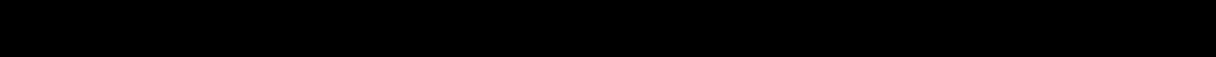

# When To Use CatBoost
Short training time on a robust data
Unlike some other machine learning algorithms, CatBoost performs well with a small data set. 

However, it is advisable to be mindful of overfitting. A little tweak to the parameters might be needed here.

Working on a small data set
This is one of the significant strengths of the CatBoost algorithm. Suppose your data set has categorical features, and converting it to numerical format seems to be quite a lot of work.

In that case, you can capitalize on the strength of CatBoost to make the process of building your model easy.

When you are working on a categorical dataset
CatBoost is incredibly faster than many other machine learning algorithms. The splitting, tree structure, and training process are optimized to be faster on GPU and CPU. 

Training on GPU is 40 times faster than on CPU, two times faster than LightGBM, and 20 times faster than XGBoost.

When To Not Use CatBoost
There are not many disadvantages of using CatBoost for whatever data set. 

So far, the hassle why many do not consider using CatBoost is because of the slight difficulty in tuning the parameters to optimize the model for categorical features.

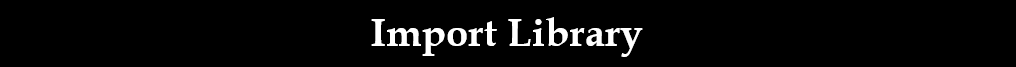

In [169]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pylab
import missingno as mns
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score

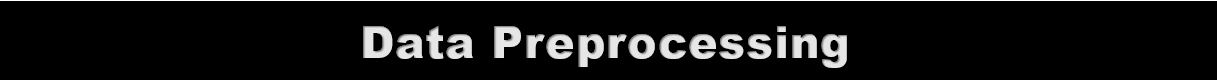

In [46]:
df=pd.read_csv("Attriction.csv")

In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [48]:
df.shape

(1470, 35)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [51]:
df.isna().sum().reset_index()

,index,0
0,Age,0
1,Attrition,0
2,BusinessTravel,0
3,DailyRate,0
4,Department,0
5,DistanceFromHome,0
6,Education,0
7,EducationField,0
8,EmployeeCount,0
9,EmployeeNumber,0


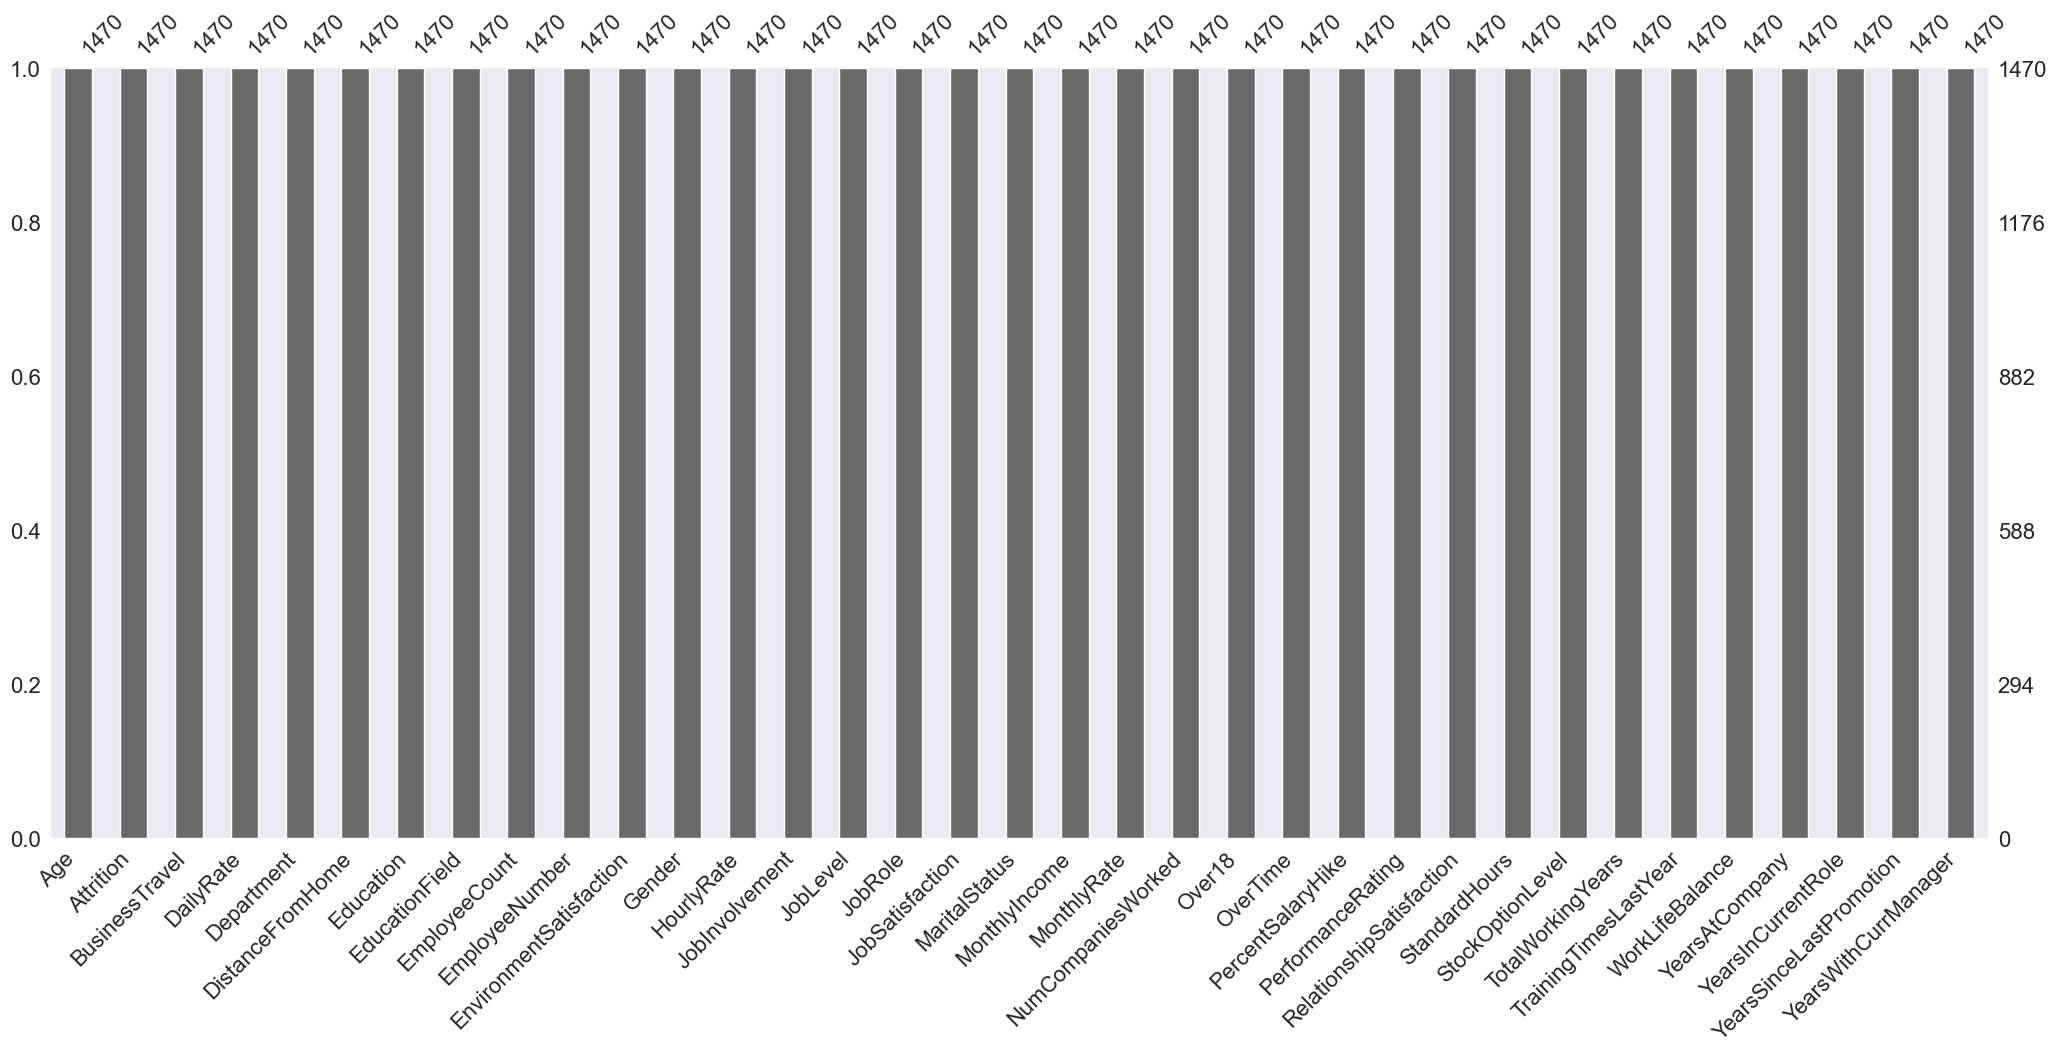

In [52]:
mns.bar(df);

## There is No Null Value in This Dataset.

In [53]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [54]:
df.drop(["EmployeeNumber","EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

In [55]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [56]:
un=df.nunique().reset_index().rename(columns={0:"unique"}).sort_values("unique",ascending=False)

In [57]:
un

,index,unique
17,MonthlyRate,1427
16,MonthlyIncome,1349
3,DailyRate,886
10,HourlyRate,71
0,Age,43
24,TotalWorkingYears,40
27,YearsAtCompany,37
5,DistanceFromHome,29
28,YearsInCurrentRole,19
30,YearsWithCurrManager,18


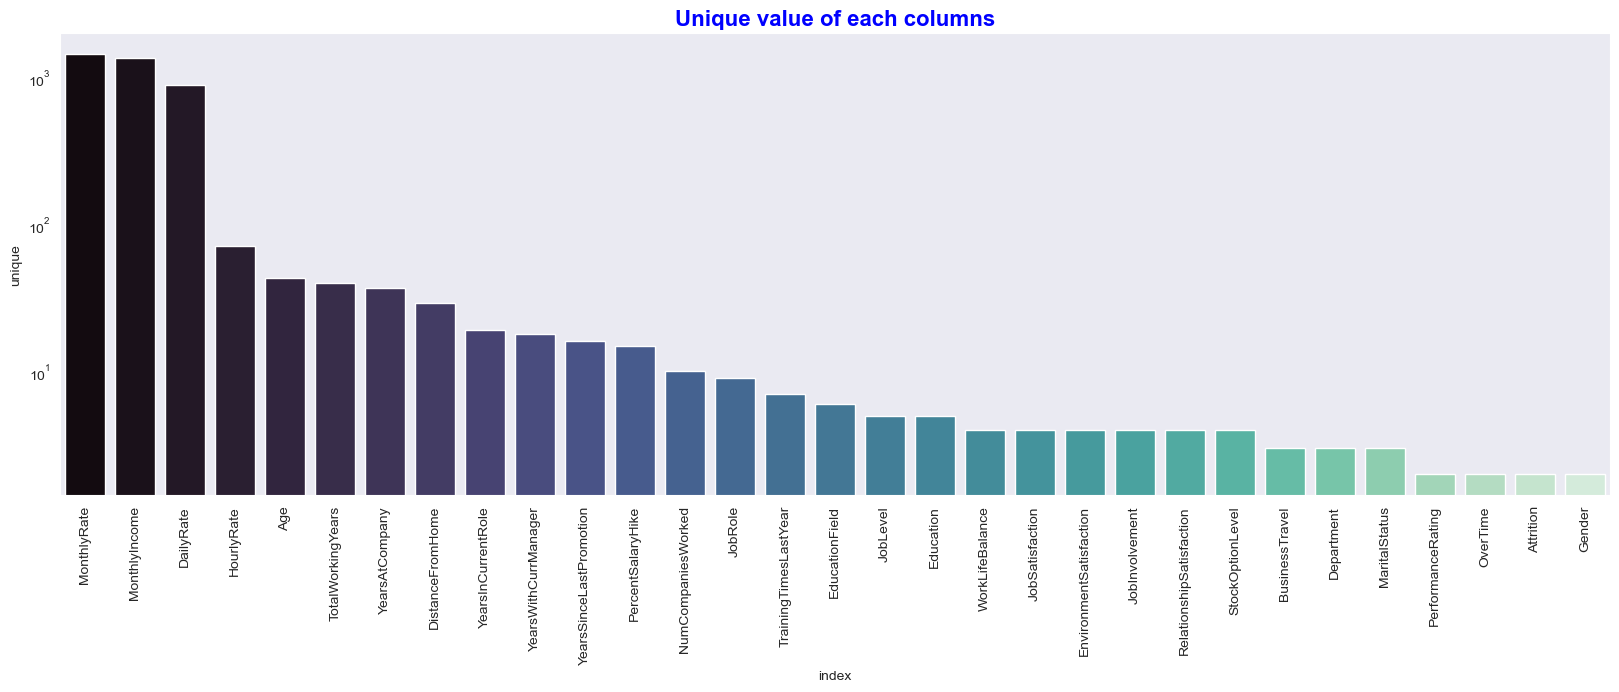

In [58]:
plt.figure(figsize=(20,6))
sns.barplot(data=un,x="index",y="unique",palette="mako")
plt.xticks(rotation=90)
plt.yscale(value="log")
#plt.locator_params()
plt.title("Unique value of each columns",fontweight="bold",fontsize=16,color='blue')
plt.show()

In [59]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


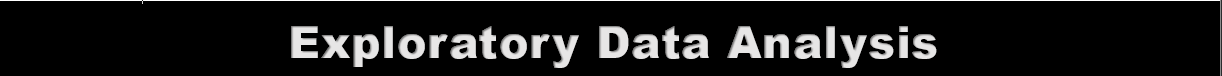

In [60]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [61]:
df.shape

(1470, 31)

In [62]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


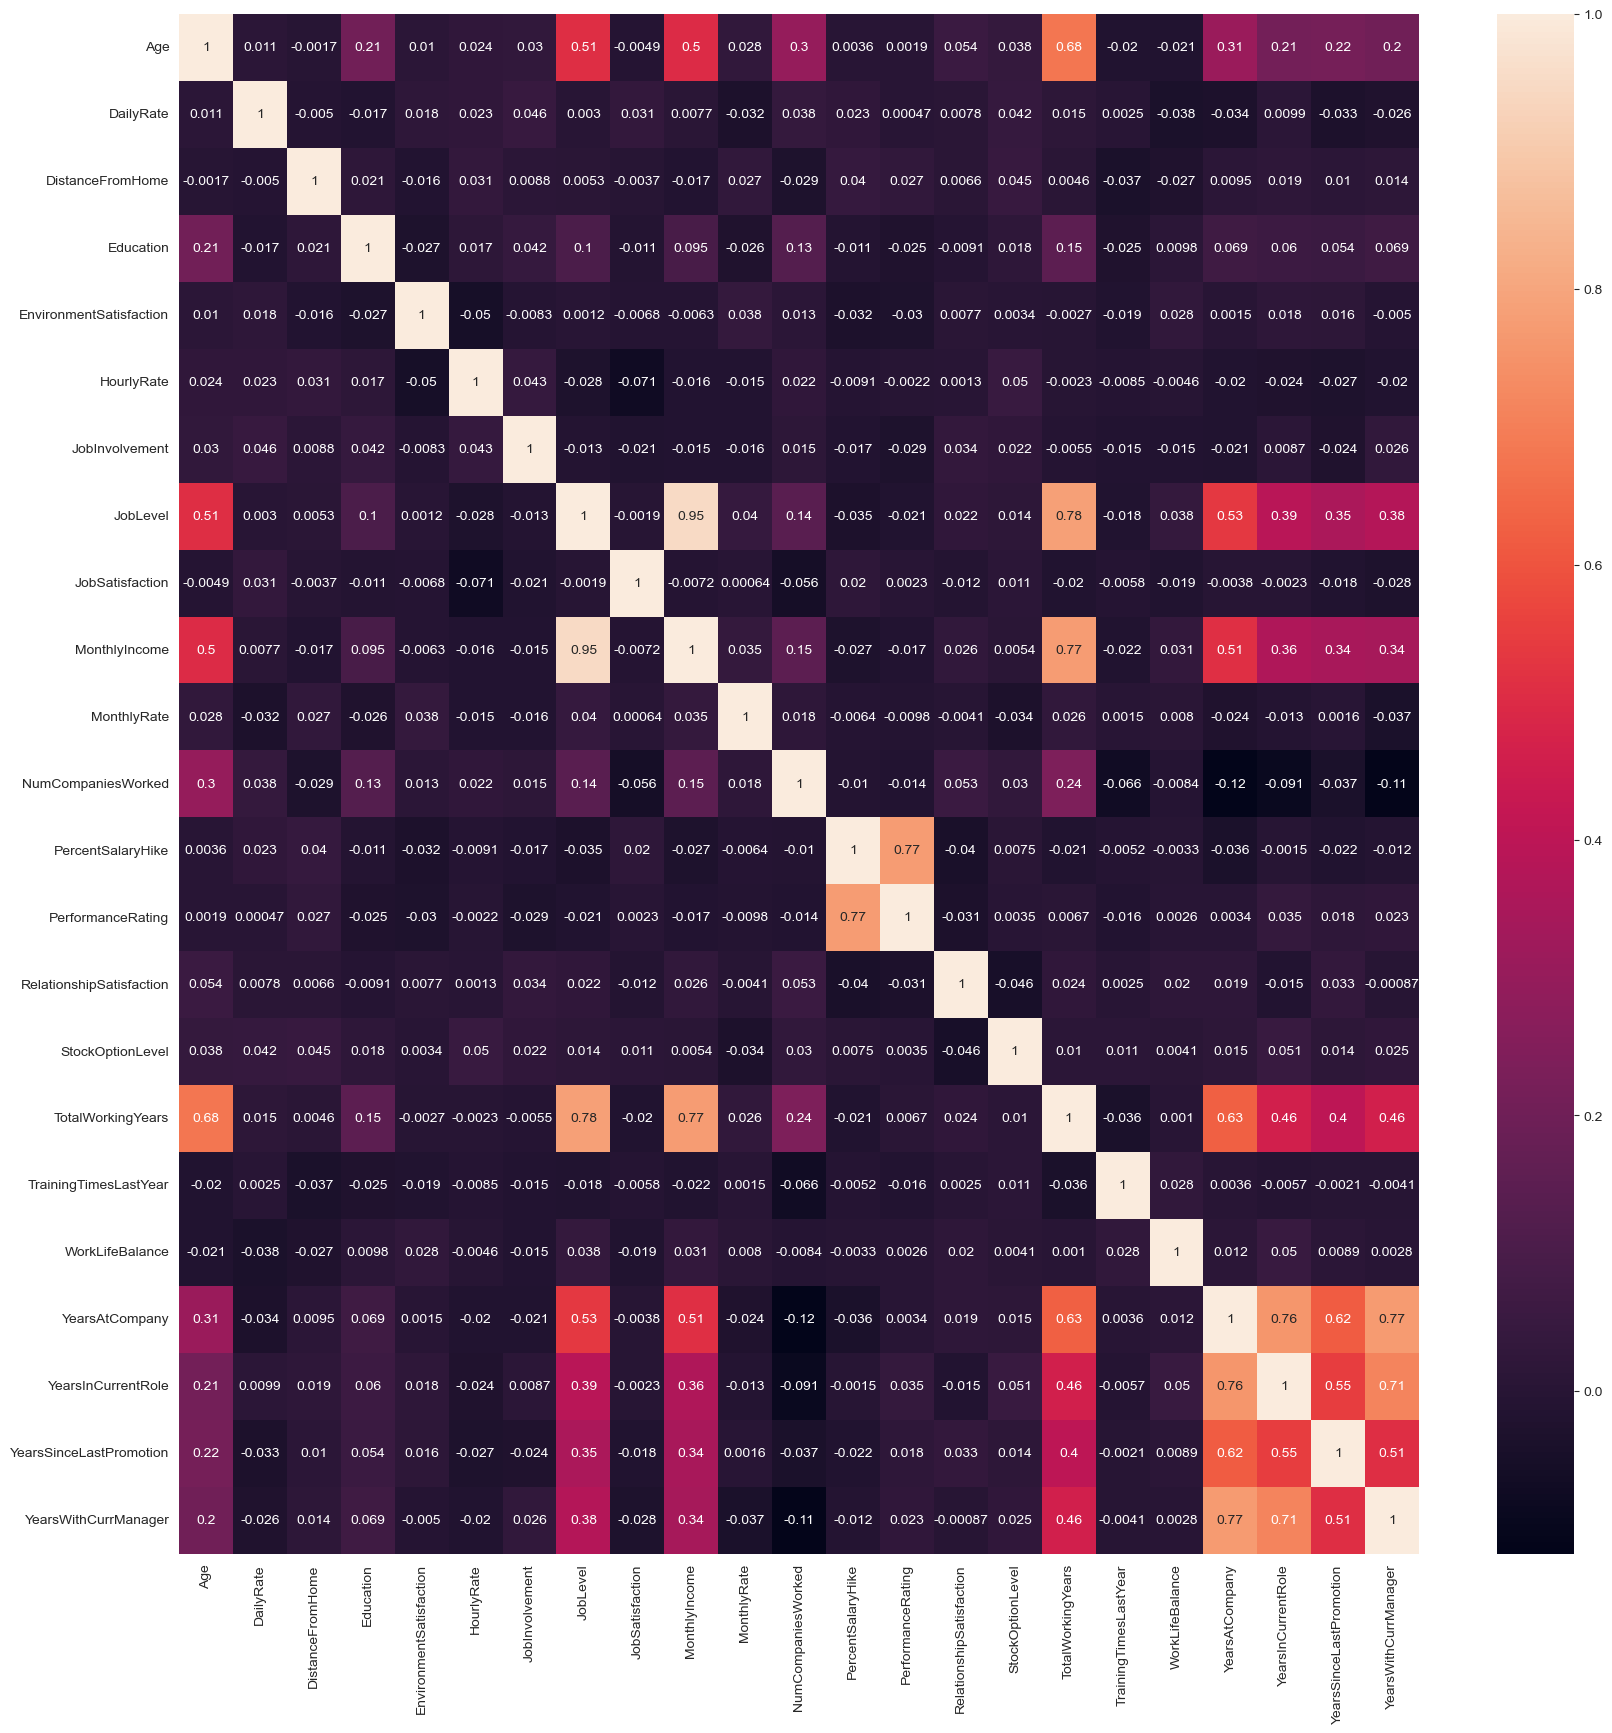

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Here plottong the Histplot of all Columns with the Help of Loop

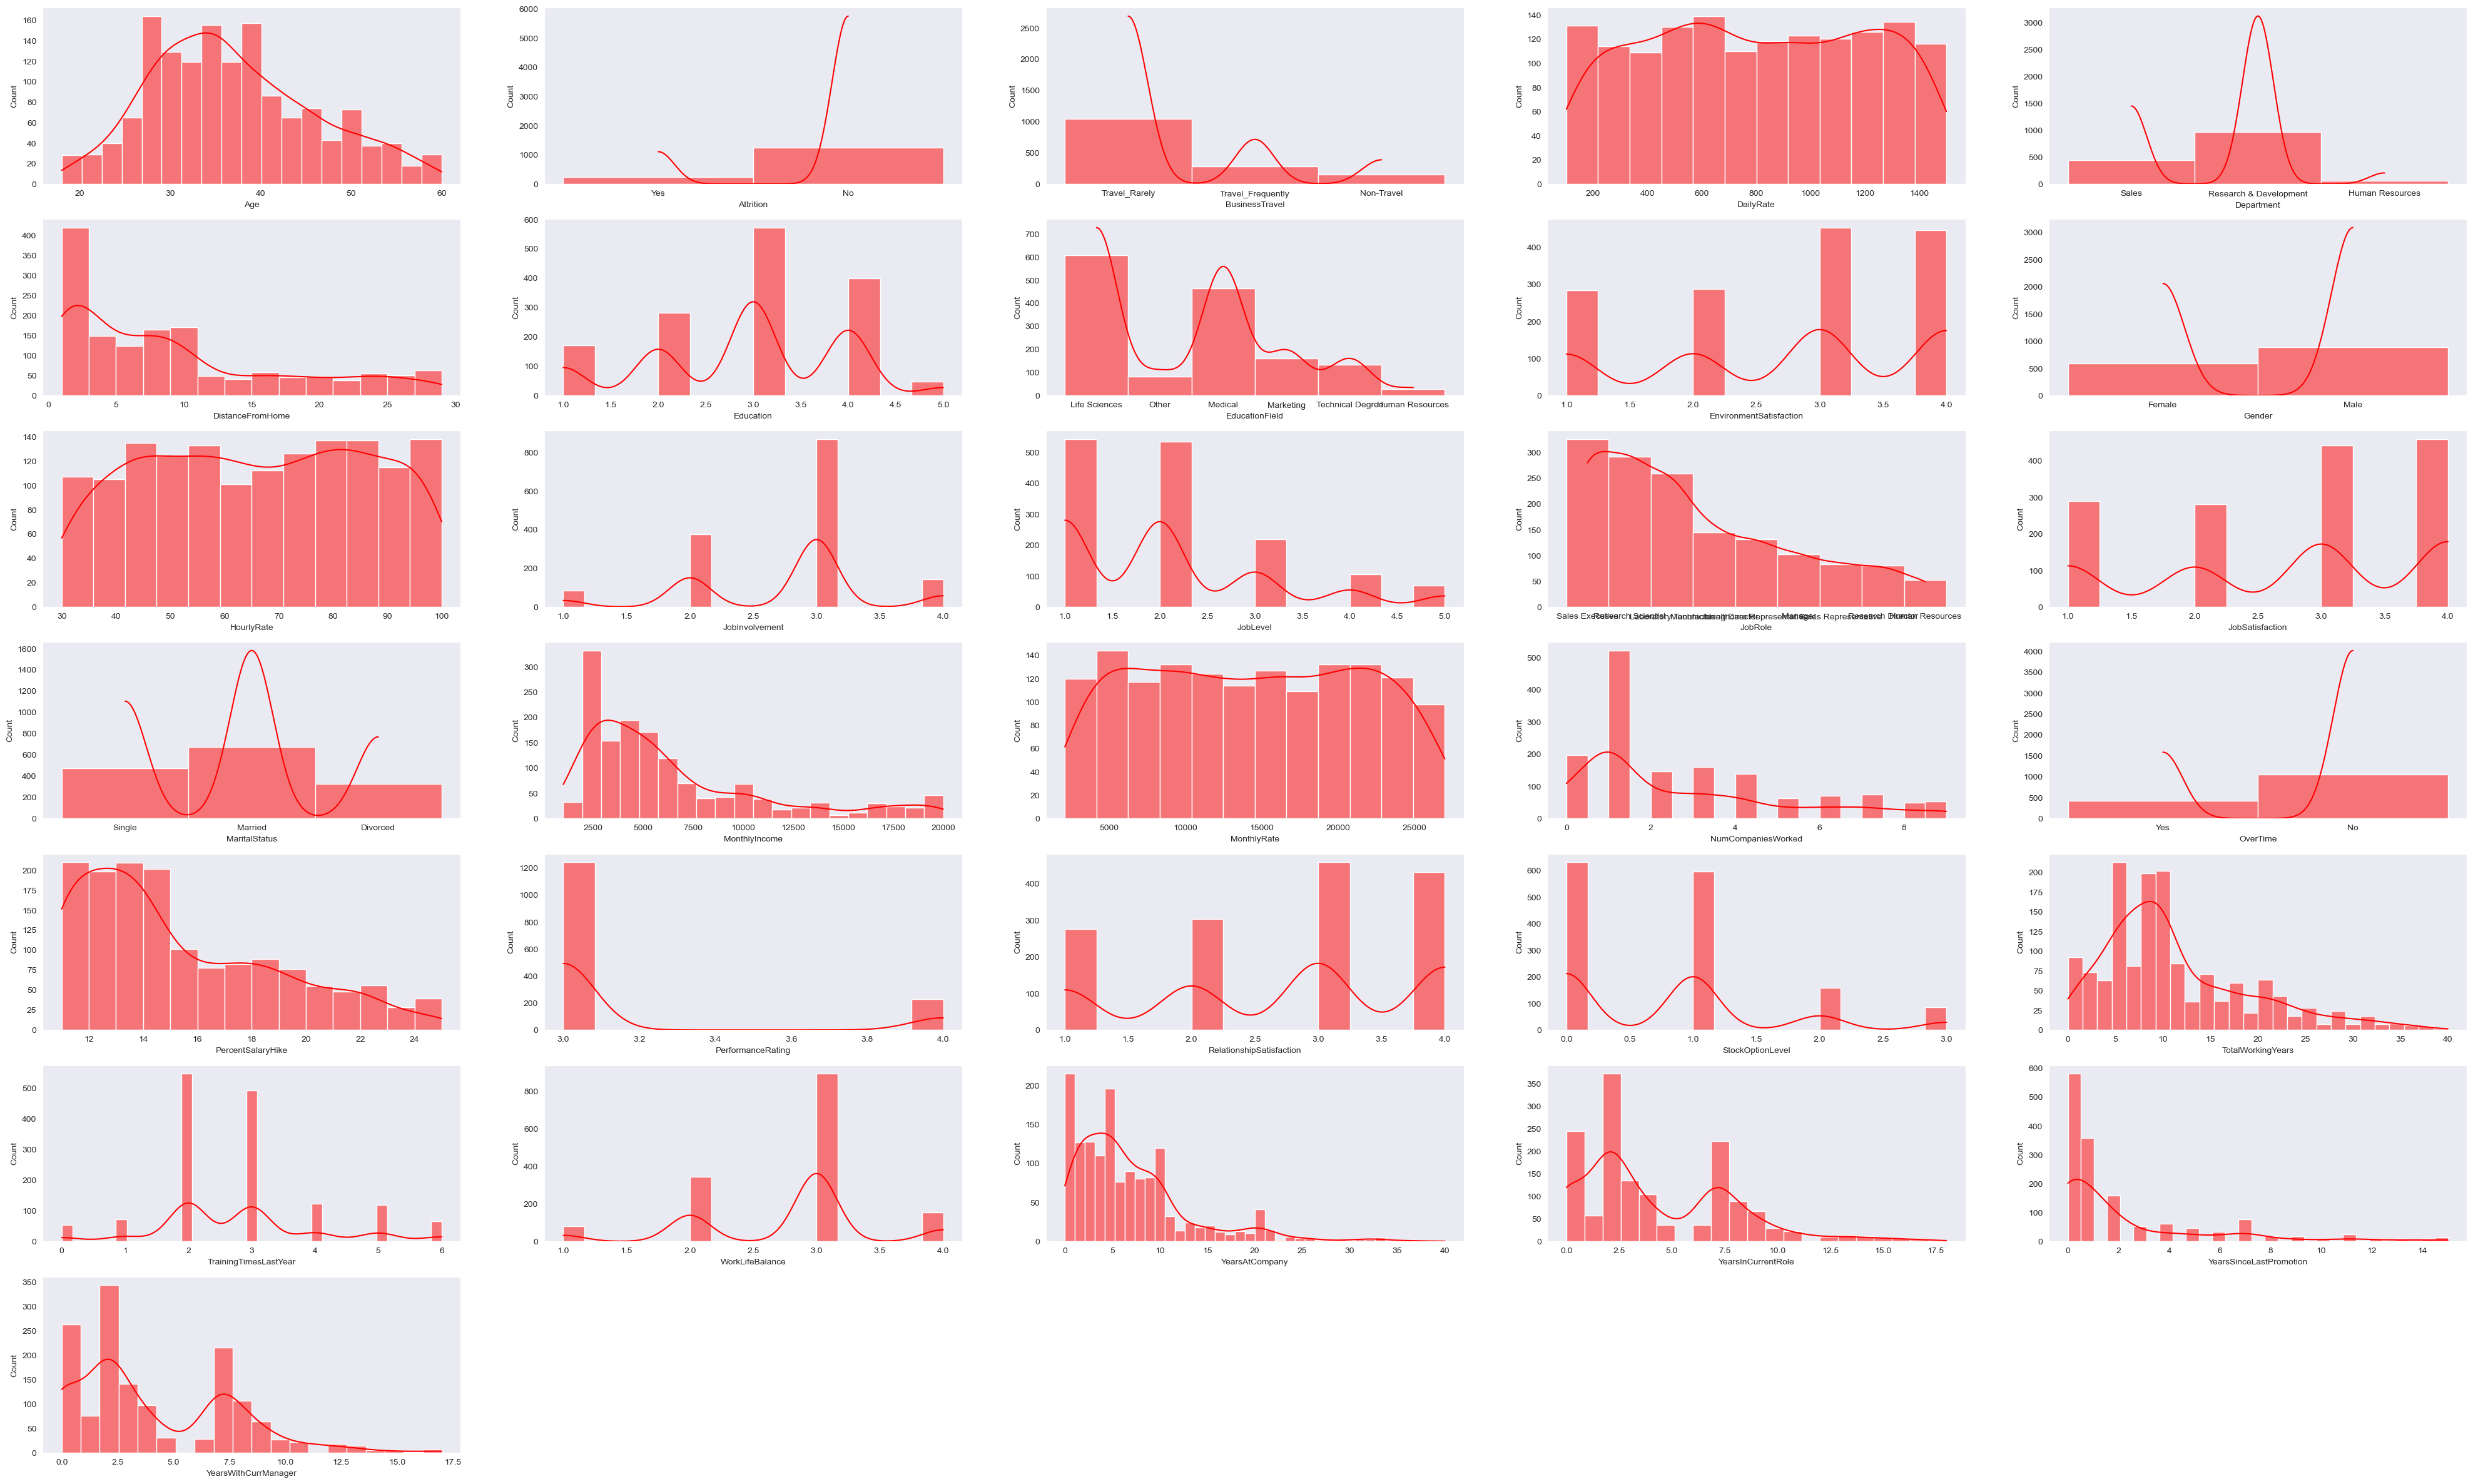

In [65]:
a=1
plt.figure(figsize=(50,30))
sns.set_style("dark")
for i in df:
    plt.subplot(7,5,a)
    sns.histplot(data=df,x=i,color="red",kde=True)
    a+=1
plt.show()

In [64]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,No,12,3,1,0,6,3,4,4,3,1,2


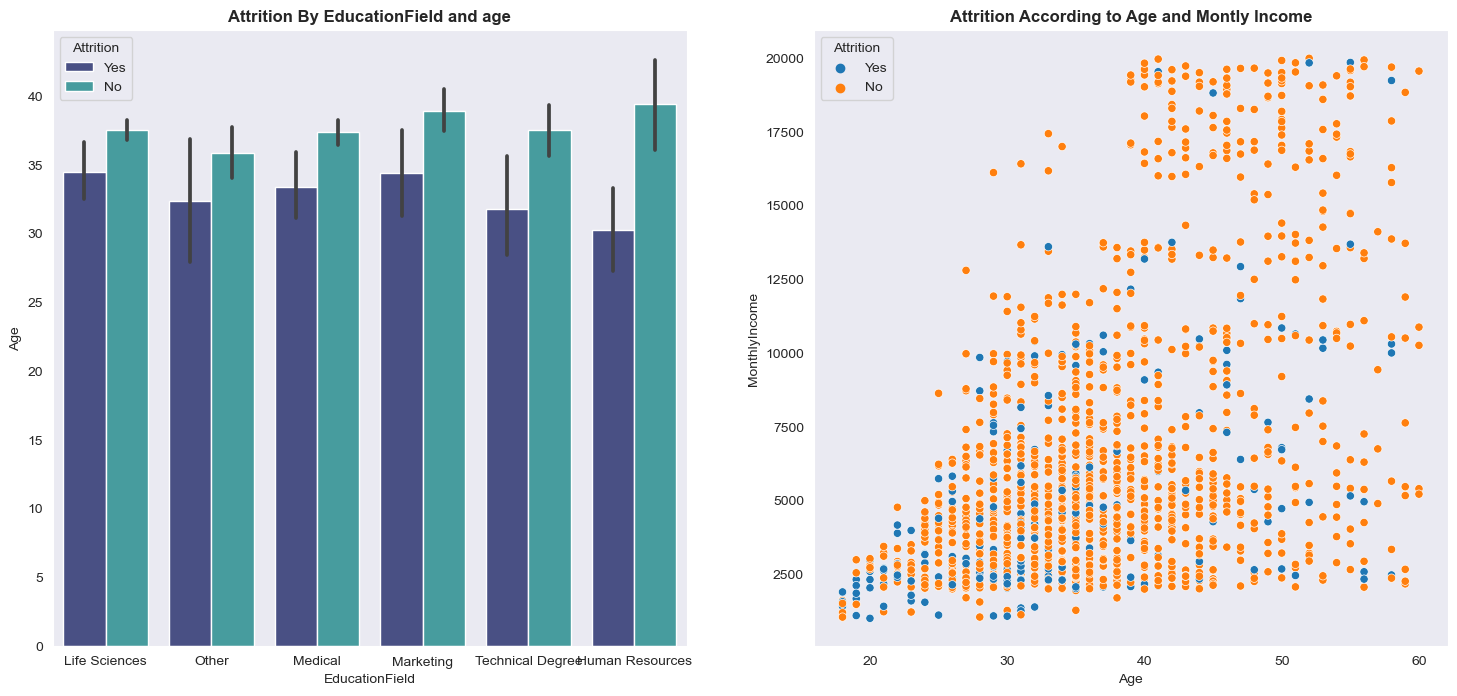

In [70]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.barplot(data=df,x='EducationField',y="Age",hue="Attrition",palette="mako")
plt.title("Attrition By EducationField and age",fontweight="bold")
plt.subplot(1,2,2)
sns.scatterplot(data=df,x="Age",y="MonthlyIncome",hue="Attrition")
plt.title("Attrition According to Age and Montly Income",fontweight="bold")
plt.show()

In [71]:
df.tail(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,No,12,3,1,0,6,3,4,4,3,1,2


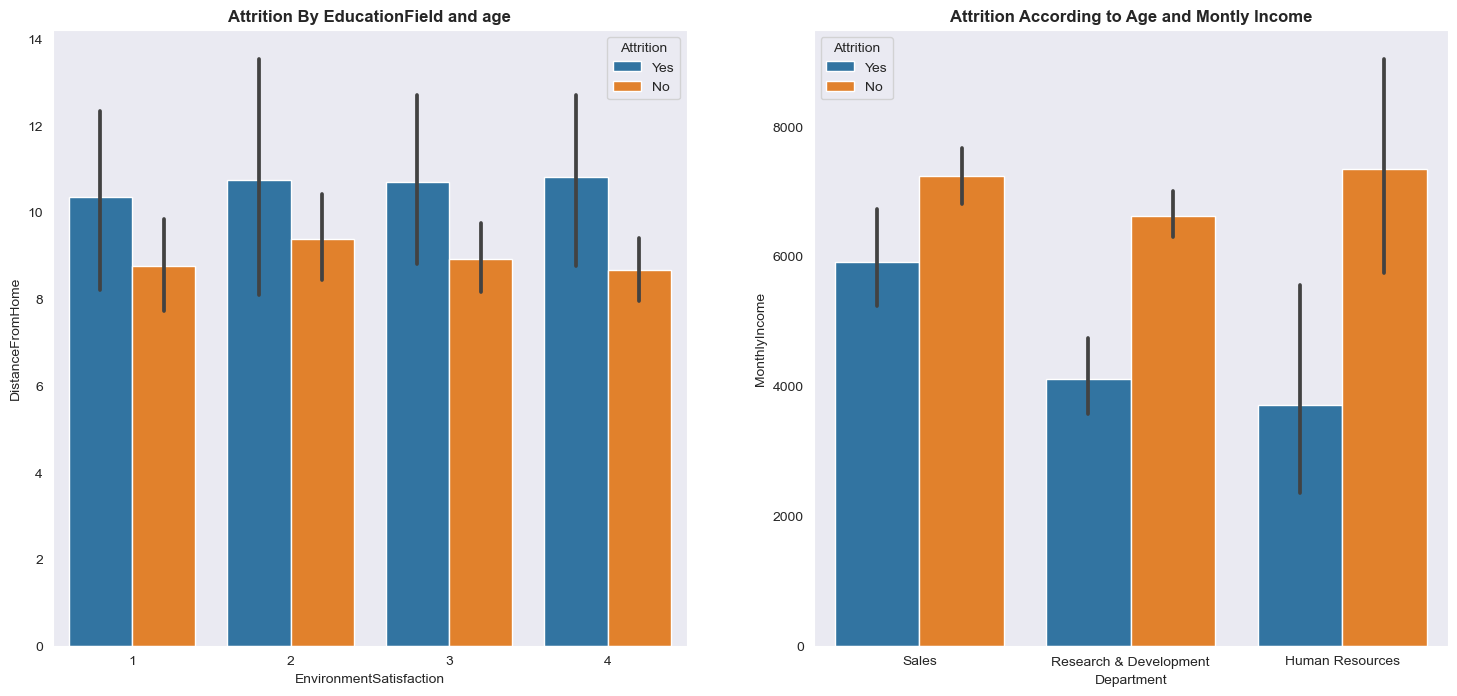

In [79]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.barplot(data=df,x='EnvironmentSatisfaction',y="DistanceFromHome",hue="Attrition")
plt.title("Attrition By EducationField and age",fontweight="bold")
plt.subplot(1,2,2)
sns.barplot(data=df,x="Department",y="MonthlyIncome",hue="Attrition")
plt.title("Attrition According to Age and Montly Income",fontweight="bold")
plt.show()

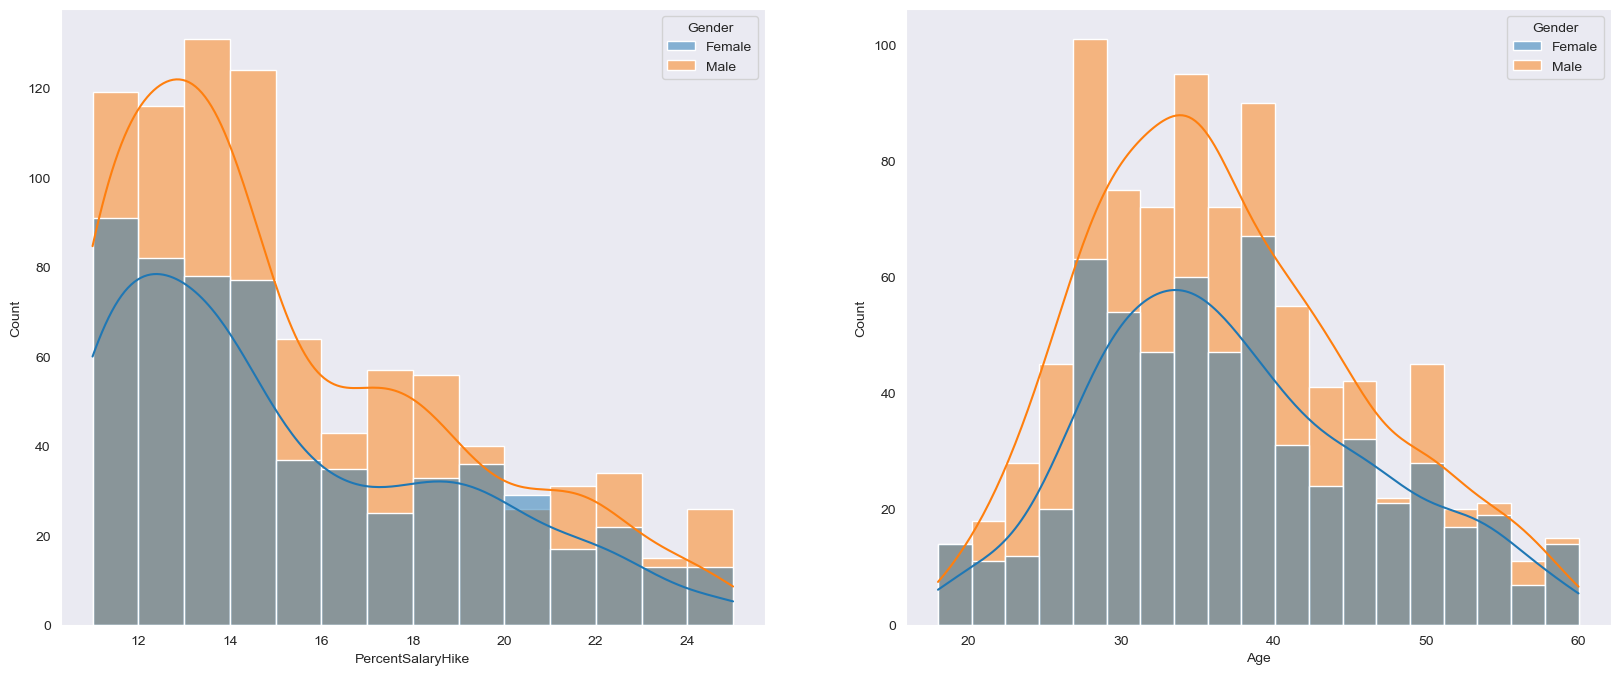

In [83]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(data=df,x="PercentSalaryHike",hue="Gender",color="blue",kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Age',hue="Gender",color="red",kde=True)
plt.show()

In [99]:
df['Attrition'].value_counts().values

array([1233,  237], dtype=int64)

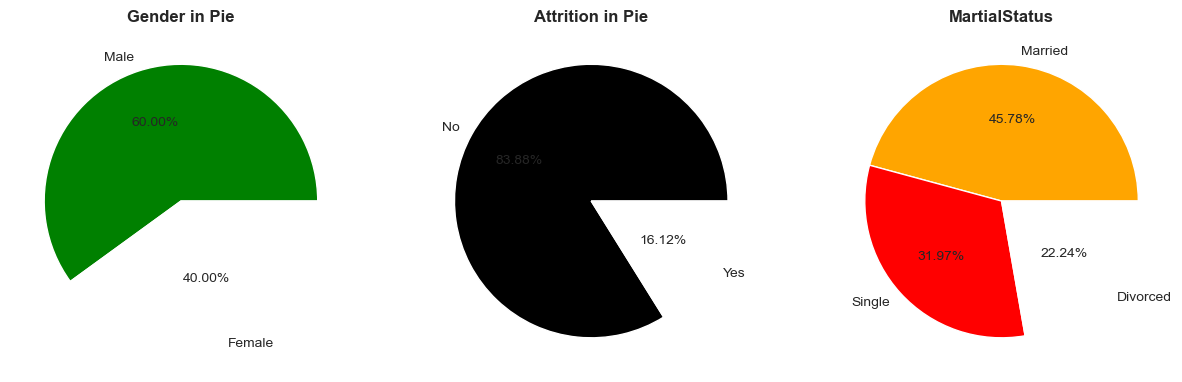

In [109]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pie(df["Gender"].value_counts().values,labels=df["Gender"].value_counts().keys(),autopct="%0.2f%%",colors=['green','w'])
plt.title("Gender in Pie",fontweight="bold")
plt.subplot(1,3,2)
plt.pie(df["Attrition"].value_counts().values,labels=df["Attrition"].value_counts().keys(),autopct="%0.2f%%",colors=["Black","w"])
plt.title("Attrition in Pie",fontweight="bold")
plt.subplot(1,3,3)
plt.pie(df["MaritalStatus"].value_counts().values,labels=df["MaritalStatus"].value_counts().keys(),autopct="%0.2f%%",colors=["orange","red","white"])
plt.title("MartialStatus",fontweight="bold")
plt.show()

In [111]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [117]:
dff=df.groupby("Education")["MonthlyIncome"].sum().reset_index()

In [118]:
px.bar(dff,x="Education",y="MonthlyIncome",text="MonthlyIncome",color="MonthlyIncome")

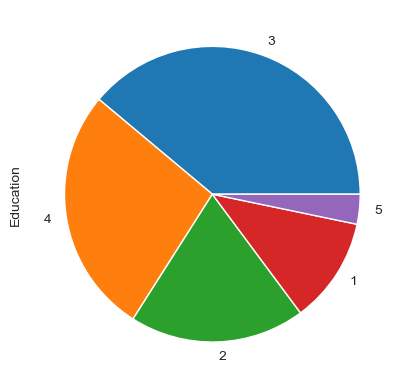

In [122]:
df['Education'].value_counts().plot(kind="pie");

In [123]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


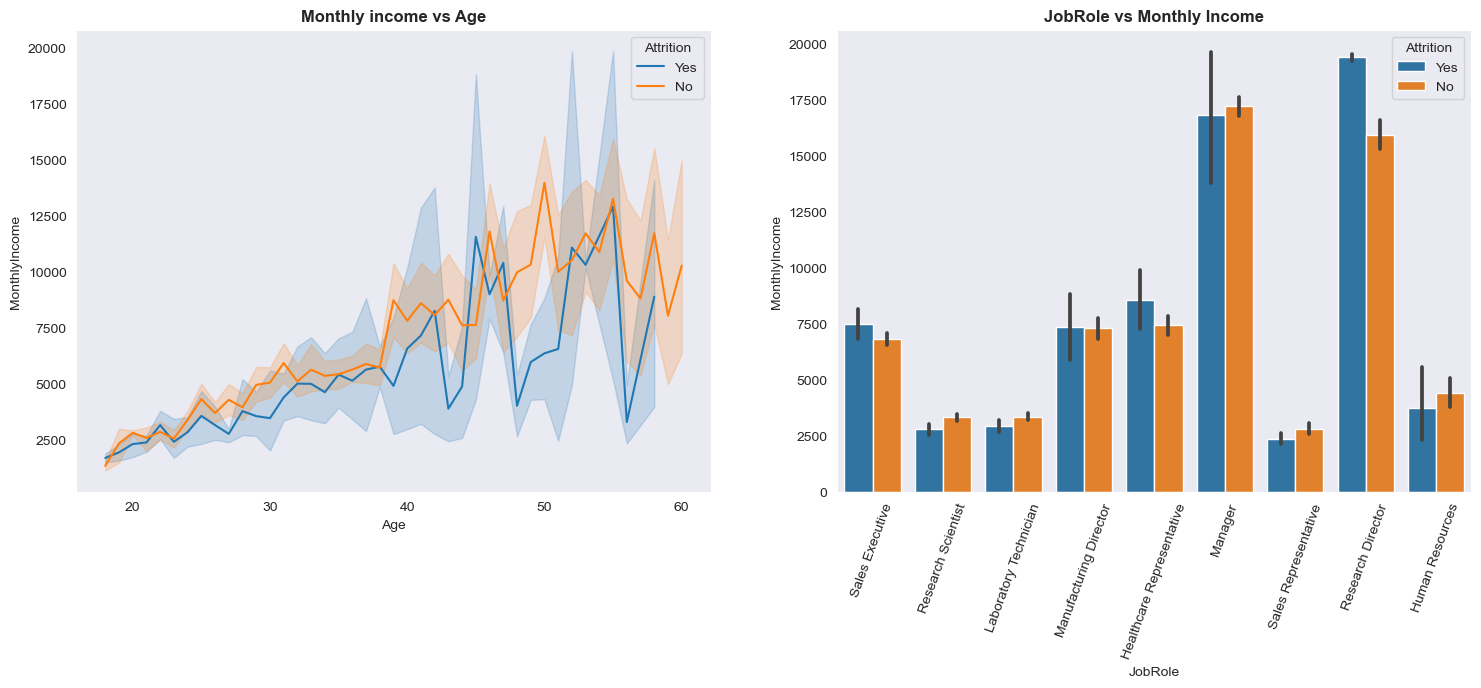

In [137]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.lineplot(data=df,x="Age",y="MonthlyIncome",hue="Attrition")
plt.title("Monthly income vs Age",fontweight="bold")
plt.subplot(1,2,2)
sns.barplot(data=df,x="JobRole",y="MonthlyIncome",hue="Attrition")
plt.xticks(rotation=70)
plt.title("JobRole vs Monthly Income",fontweight="bold")
plt.show()

In [138]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


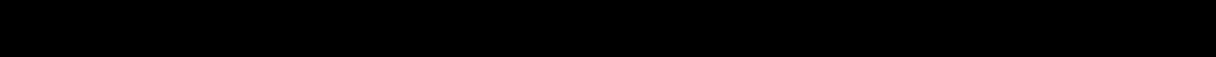

In [139]:
# Now Label Encoding the data from categorical to integer

In [140]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [150]:
ln=LabelEncoder()

In [156]:
for i in df:
    if df[i].dtypes == "object":
        df[i]=ln.fit_transform(df[i])

In [157]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [158]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


In [159]:
# Extract features and Labels from the dataset

In [160]:
x=df.drop("Attrition",axis=1)

In [161]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


In [162]:
y=df[['Attrition']]

In [163]:
y.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Attrition,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [164]:
# Now Get ready for train test and split the data from features and lables

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [168]:
print("-"*120)
print(f"The shape of the x_train :{x_train.shape}")
print("-"*120)
print(f"The shape of the y_train :{y_train.shape}")
print("-"*120)
print(f"The shape of the x_test  :{x_test.shape}")
print("-"*120)
print(f"The shape of the y_test  :{y_test.shape}")
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
The shape of the x_train :(1176, 30)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_train :(1176, 1)
------------------------------------------------------------------------------------------------------------------------
The shape of the x_test  :(294, 30)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_test  :(294, 1)
------------------------------------------------------------------------------------------------------------------------


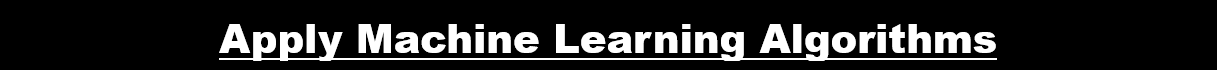

In [188]:
cat = CatBoostClassifier().fit(x_train,y_train)

Learning rate set to 0.011041
0:	learn: 0.6846964	total: 6.37ms	remaining: 6.36s
1:	learn: 0.6765974	total: 11.5ms	remaining: 5.72s
2:	learn: 0.6685044	total: 17.4ms	remaining: 5.77s
3:	learn: 0.6605941	total: 23.4ms	remaining: 5.82s
4:	learn: 0.6536891	total: 28.9ms	remaining: 5.75s
5:	learn: 0.6465719	total: 34.5ms	remaining: 5.72s
6:	learn: 0.6397559	total: 40.2ms	remaining: 5.71s
7:	learn: 0.6324236	total: 45.7ms	remaining: 5.67s
8:	learn: 0.6258825	total: 50ms	remaining: 5.51s
9:	learn: 0.6192188	total: 55.6ms	remaining: 5.51s
10:	learn: 0.6131306	total: 61.1ms	remaining: 5.5s
11:	learn: 0.6063066	total: 67.1ms	remaining: 5.53s
12:	learn: 0.6007068	total: 72.5ms	remaining: 5.5s
13:	learn: 0.5946013	total: 77.7ms	remaining: 5.47s
14:	learn: 0.5883663	total: 83.2ms	remaining: 5.46s
15:	learn: 0.5827671	total: 88.1ms	remaining: 5.42s
16:	learn: 0.5772232	total: 92.9ms	remaining: 5.37s
17:	learn: 0.5716381	total: 97.7ms	remaining: 5.33s
18:	learn: 0.5663704	total: 103ms	remaining: 5.3

In [189]:
pred=cat.predict(x_test)

In [192]:
ac=cat.score(x_test,y_test)

In [193]:
acc=cat.score(x_train,y_train)

In [194]:
print("-"*120)
print(pred)
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
------------------------------------------------------------------------------------------------------------------------


In [195]:
print("-"*120)
print(f"The Accuracy of the test data is : {ac}")
print("-"*120)
print(f"The Accuracy of the train data is : {acc}")
print("-"*120)


------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data is : 0.8537414965986394
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train data is : 0.9897959183673469
------------------------------------------------------------------------------------------------------------------------


In [197]:
cm=confusion_matrix(y_test,pred)

In [198]:
cm

array([[234,   3],
       [ 40,  17]], dtype=int64)

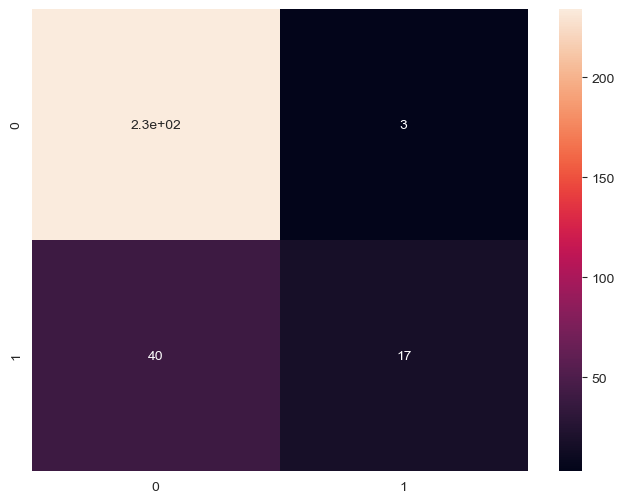

In [199]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [200]:
clr=classification_report(y_test,pred)

In [201]:
print(clr)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       237
           1       0.85      0.30      0.44        57

    accuracy                           0.85       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.85      0.85      0.82       294



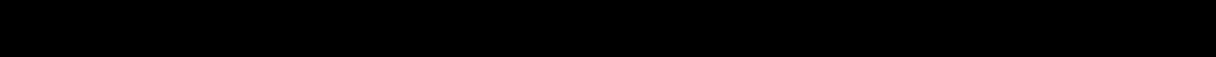

In [196]:
# There is Getting overfitting like According to the Accuracy of  the train and test

## Now we Have to go with HyperTunning the model cat Boost

In [202]:
ct=CatBoostClassifier()

In [203]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5,]
       }

In [204]:
grd=GridSearchCV(estimator=ct,param_grid=grid,cv=5,n_jobs=-1,verbose=1)
grd.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6710652	total: 7.31ms	remaining: 7.3s
1:	learn: 0.6504033	total: 14.2ms	remaining: 7.07s
2:	learn: 0.6308568	total: 20ms	remaining: 6.66s
3:	learn: 0.6122937	total: 26.9ms	remaining: 6.7s
4:	learn: 0.5972717	total: 34ms	remaining: 6.77s
5:	learn: 0.5821461	total: 39.6ms	remaining: 6.56s
6:	learn: 0.5684931	total: 47.5ms	remaining: 6.74s
7:	learn: 0.5538156	total: 53.2ms	remaining: 6.6s
8:	learn: 0.5389534	total: 59.3ms	remaining: 6.53s
9:	learn: 0.5279544	total: 65.2ms	remaining: 6.45s
10:	learn: 0.5181875	total: 70.4ms	remaining: 6.33s
11:	learn: 0.5097911	total: 74.2ms	remaining: 6.11s
12:	learn: 0.4992210	total: 80.5ms	remaining: 6.11s
13:	learn: 0.4891282	total: 85.9ms	remaining: 6.05s
14:	learn: 0.4801122	total: 92.8ms	remaining: 6.09s
15:	learn: 0.4727668	total: 97.9ms	remaining: 6.02s
16:	learn: 0.4652968	total: 103ms	remaining: 5.96s
17:	learn: 0.4581786	total: 109ms	remaining: 5.93s
18:	learn: 0.4501878	t

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017F88099F40>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1]},
             verbose=1)

In [205]:
grd.score(x_test,y_test)

0.8571428571428571

In [206]:
grd.score(x_train,y_train)

1.0

In [208]:
p=grd.best_params_

In [210]:
ctt=CatBoostClassifier(**p).fit(x_train,y_train)

0:	learn: 0.6710652	total: 4.98ms	remaining: 4.97s
1:	learn: 0.6504033	total: 9.95ms	remaining: 4.96s
2:	learn: 0.6308568	total: 15ms	remaining: 4.99s
3:	learn: 0.6122937	total: 20.5ms	remaining: 5.09s
4:	learn: 0.5972717	total: 24.9ms	remaining: 4.96s
5:	learn: 0.5821461	total: 30.9ms	remaining: 5.12s
6:	learn: 0.5684931	total: 35.9ms	remaining: 5.1s
7:	learn: 0.5538156	total: 41.9ms	remaining: 5.2s
8:	learn: 0.5389534	total: 46.1ms	remaining: 5.07s
9:	learn: 0.5279544	total: 51.2ms	remaining: 5.07s
10:	learn: 0.5181875	total: 56.3ms	remaining: 5.06s
11:	learn: 0.5097911	total: 59ms	remaining: 4.86s
12:	learn: 0.4992210	total: 63.7ms	remaining: 4.83s
13:	learn: 0.4891282	total: 68.5ms	remaining: 4.82s
14:	learn: 0.4801122	total: 73.8ms	remaining: 4.84s
15:	learn: 0.4727668	total: 78.7ms	remaining: 4.84s
16:	learn: 0.4652968	total: 84.1ms	remaining: 4.86s
17:	learn: 0.4581786	total: 89.2ms	remaining: 4.87s
18:	learn: 0.4501878	total: 94.8ms	remaining: 4.9s
19:	learn: 0.4441030	total: 9

In [211]:
ctt.score(x_test,y_test)

0.8571428571428571

In [213]:
ctt.score(x_train,y_train)

1.0

In [214]:
predd=ctt.predict(x_test)

In [215]:
print("-"*120)
print(predd)
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
------------------------------------------------------------------------------------------------------------------------


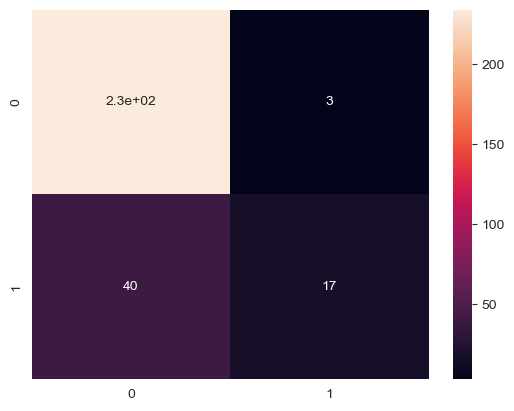

In [216]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True);

# Done_______📝📝📝📝

# Thanks for Watching My Notebook